In [59]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

In [67]:
data_path = '../../data/metadata/'

In [68]:
fandom_list = os.listdir(data_path)

In [69]:
fandom_list = [i.strip() for i in open('../../data/fandom_filtered_list')]

In [70]:
cos_path = '../../data/temporal_unigram_cos/'

In [71]:
di = pickle.load(open( cos_path + fandom_list[0] +'.pkl','rb'))

In [72]:
df2 = pd.DataFrame.from_dict(di, orient='index').reset_index()

In [73]:
df2.columns = ['time', 'cosine']

In [74]:
df2.head()

,time,cosine
0,2013-01_2013-02_2013-03,0.101312
1,2013-02_2013-03_2013-04,0.123094
2,2015-06_2015-07_2015-08,0.074499
3,2012-07_2012-08_2012-09,0.097520
4,2012-06_2012-07_2012-08,0.122542


In [75]:
def create_timelist(df):
    timelist = df.PublishDate.drop_duplicates().tolist()
    timelist = [str(i)[:7] for i in timelist]
    return sorted(list(set(timelist)))

In [76]:
def create_timewindow(timelist, window_len):
    idx = 0
    window_all = []
    while idx <= len(timelist) - window_len:
        time_window = []
        for i in range(0, window_len):
            time_window.append(timelist[idx + i])
        idx += 1
        window_all.append(time_window)
    return window_all

In [77]:
def create_df_time(df, time_window):
    dfs = []
    for time in time_window:
        dfs.append(df[df.PublishDate.str[:7] == time])
    return pd.concat(dfs)

In [78]:
def get_author(window):
    df_t = create_df_time(df, window)
    authors = set(df_t.Author.tolist())
    return len(authors)

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


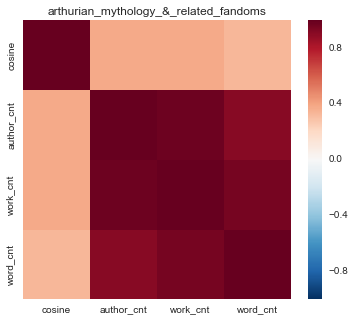

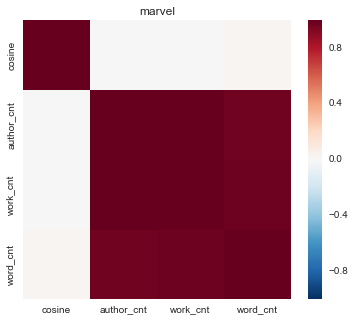

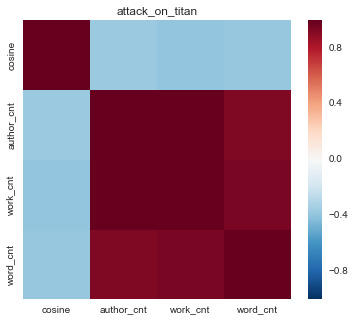

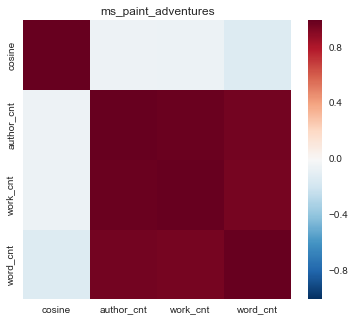

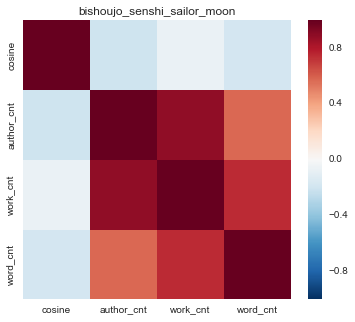

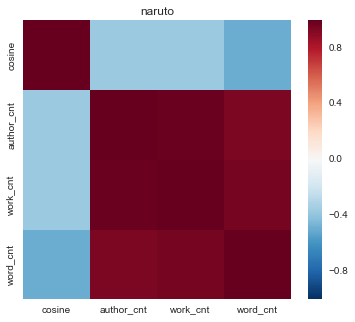

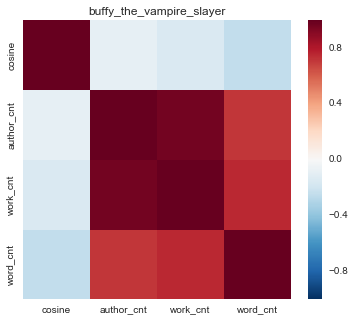

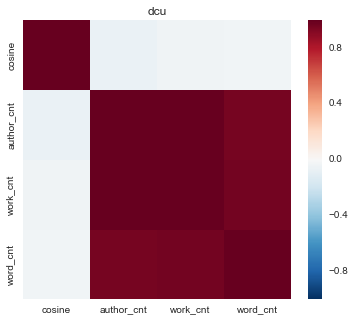

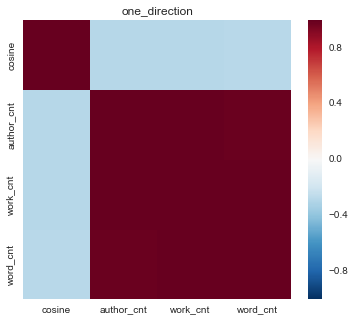

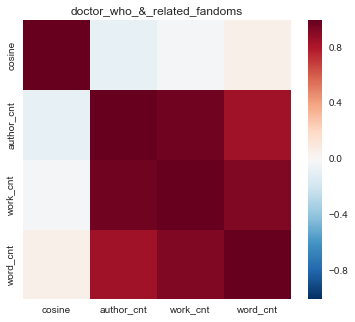

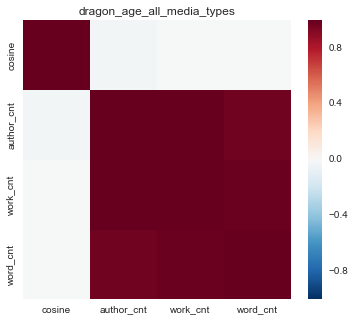

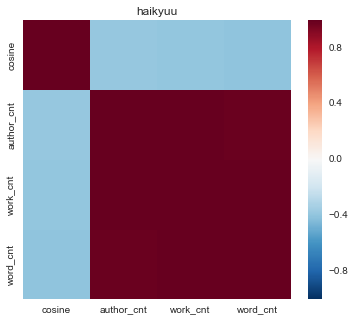

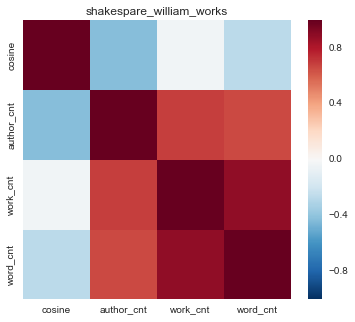

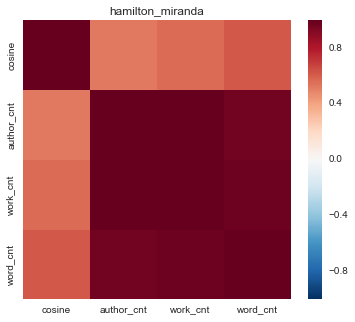

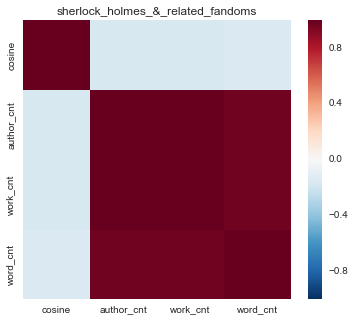

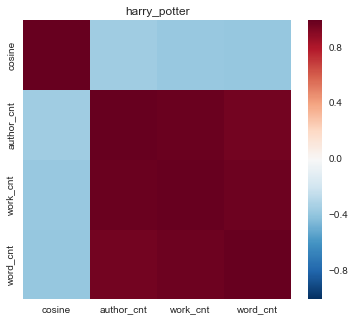

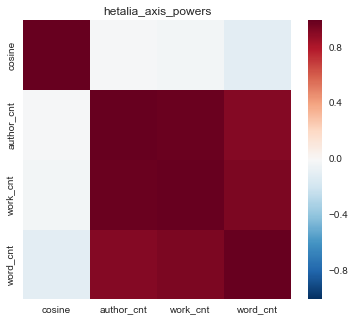

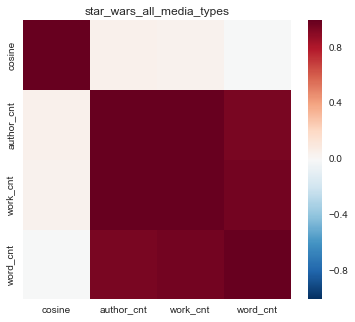

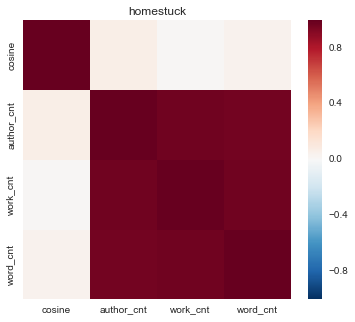

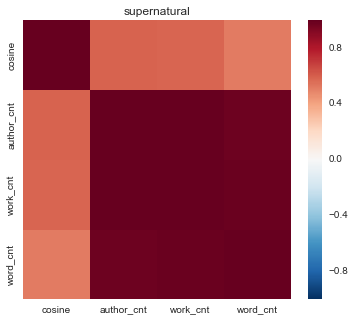

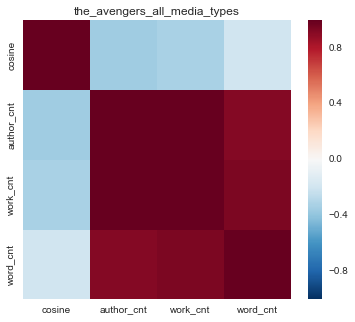

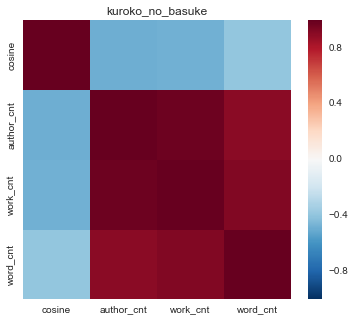

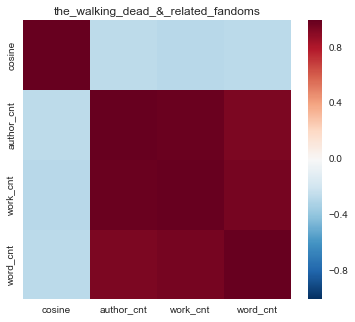

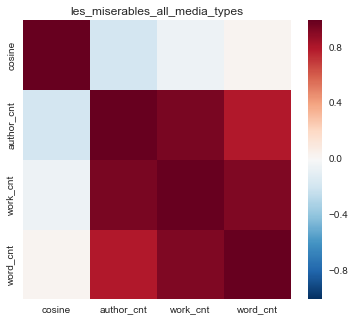

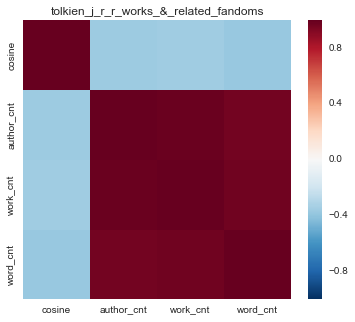

In [79]:
for idx, fandom in enumerate(fandom_list):
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    df = df[['Author', 'PublishDate', 'Words']]
    
    di = pickle.load(open( cos_path + fandom +'.pkl','rb'))
    df2 = pd.DataFrame.from_dict(di, orient='index').reset_index()
    df2.columns = ['time', 'cosine']
    
    timelist = create_timelist(df)
    windows = create_timewindow(timelist, 3)
    time_author_dict = {}
    time_work_dict = {}
    time_word_dict = {}
    for window in windows:
        df_t = create_df_time(df, window)
        authors = set(df_t.Author.tolist())
        key = '_'.join([i for i in window])
        time_author_dict[key] = len(authors)
        time_work_dict[key] = len(df_t)
        time_word_dict[key] = np.sum(df_t.Words)
    df2['author_cnt'] = df2['time'].map(time_author_dict)
    df2['work_cnt'] = df2['time'].map(time_work_dict)
    df2['word_cnt'] = df2['time'].map(time_word_dict)
    plt.figure(figsize = (6,5))
    sns.heatmap(df2[['cosine', 'author_cnt', 'work_cnt', 'word_cnt']].astype(float).corr(),center=0)
    plt.title(fandom)

In [58]:
df2.head()

,time,cosine,author_cnt,work_cnt,word_cnt
0,2013-01_2013-02_2013-03,0.101312,643,2803,69642105.0
1,2013-02_2013-03_2013-04,0.123094,583,2495,66760904.0
2,2015-06_2015-07_2015-08,0.074499,572,2954,104266446.0
3,2012-07_2012-08_2012-09,0.097520,352,1699,65181718.0
4,2012-06_2012-07_2012-08,0.122542,347,1734,57631263.0


### Number of authors

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


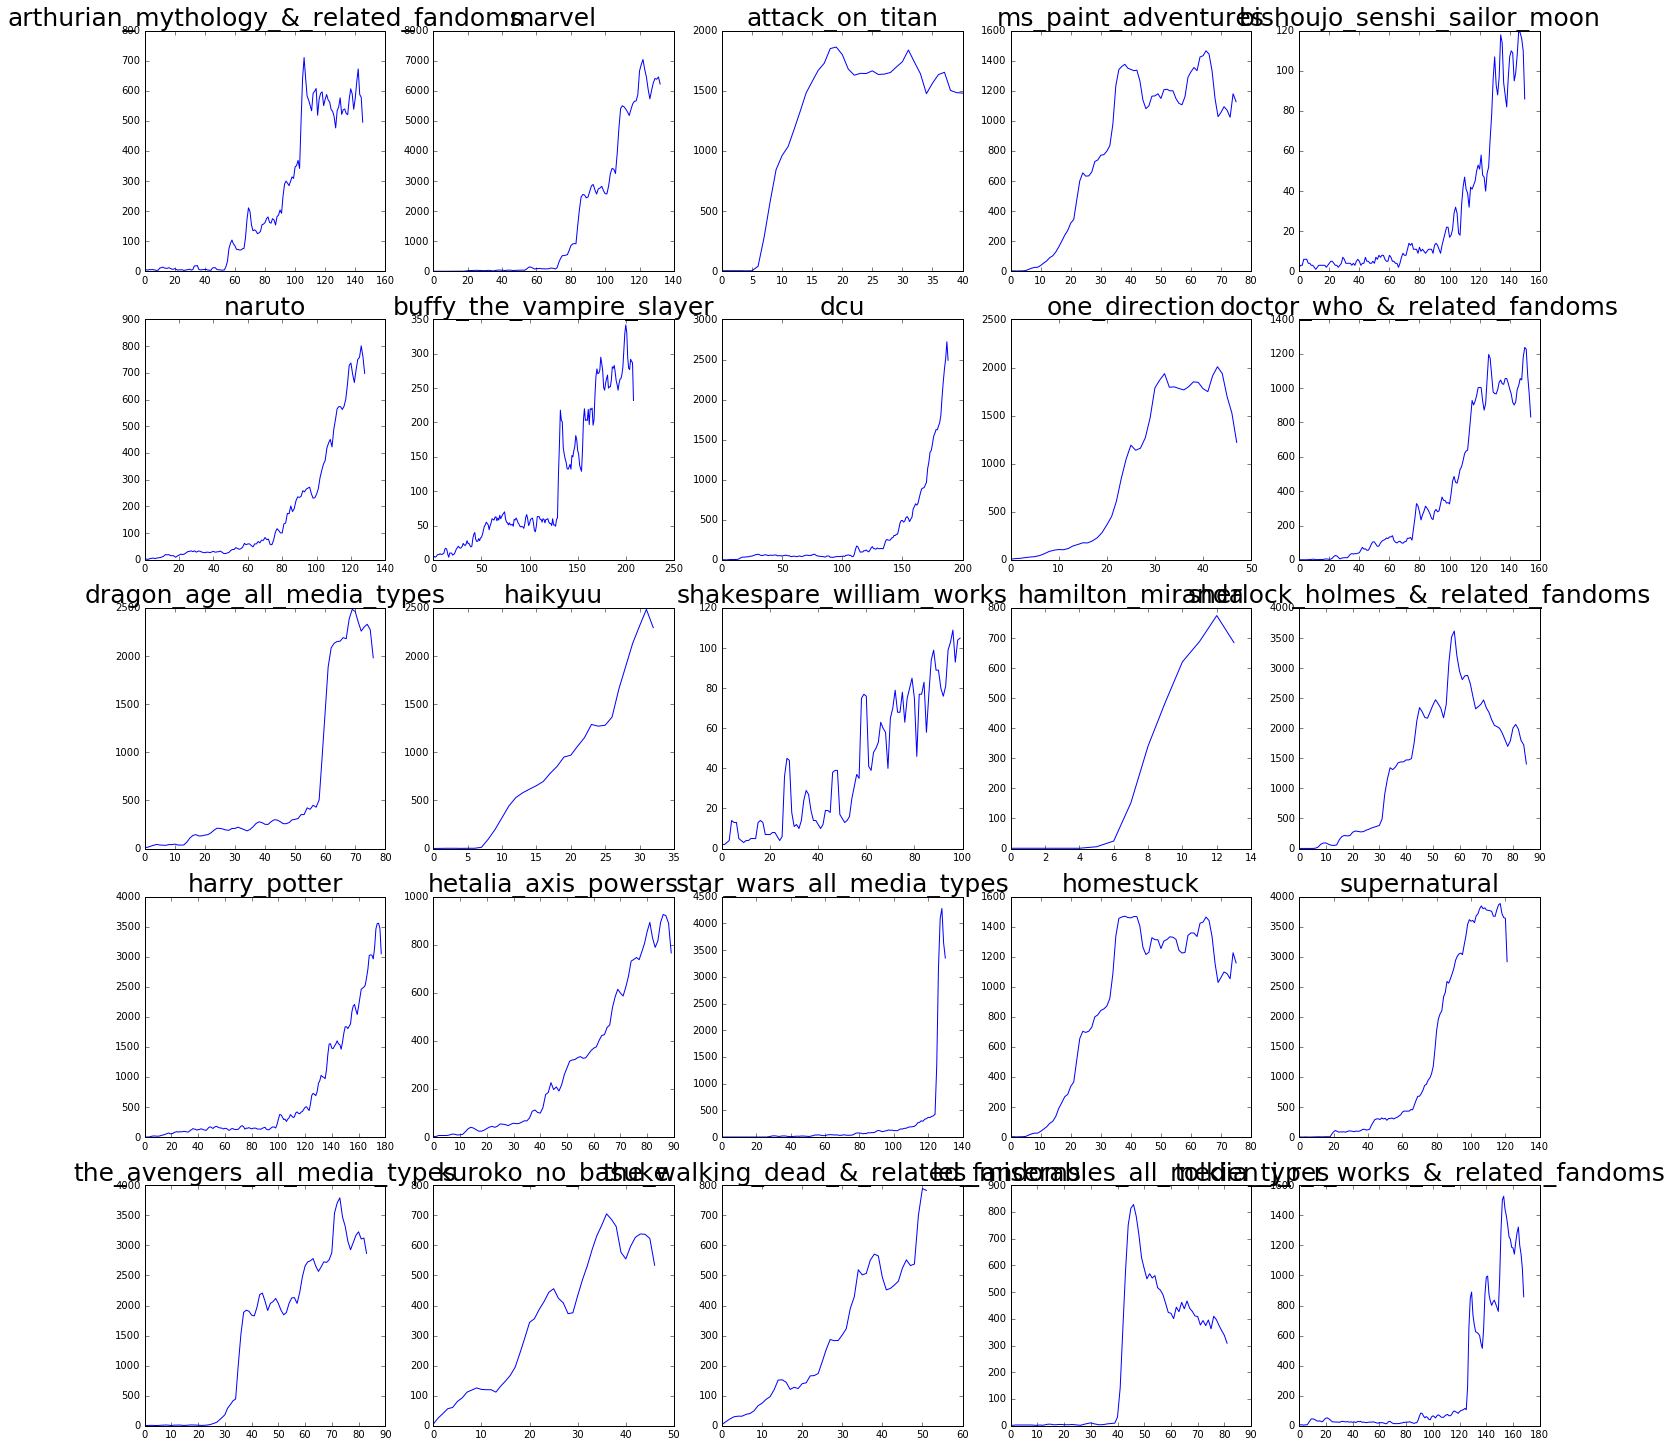

In [31]:
fig, axs = plt.subplots(5,5, figsize=(25, 25))
axs = axs.ravel()

for idx, fandom in enumerate(fandom_list):
    time_author_dict = {}
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    cos_dict = {}
    timelist = create_timelist(df)
    windows = create_timewindow(timelist, 3)
    for window in windows:
        df_t = create_df_time(df, window)
        df_t = df_t.Author
        authors = set(df_t.Author.tolist())
        key = '_'.join([i for i in window])
        time_author_dict[key] = len(authors)

    labels = sorted(time_author_dict.keys())
    x = range(0, len(labels))
    y = [time_author_dict[k] for k in labels]
    axs[idx].plot(x, y) 
    axs[idx].set_title(fandom.replace('_metadata.tsv', ''), fontsize=25)


### Number of works

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


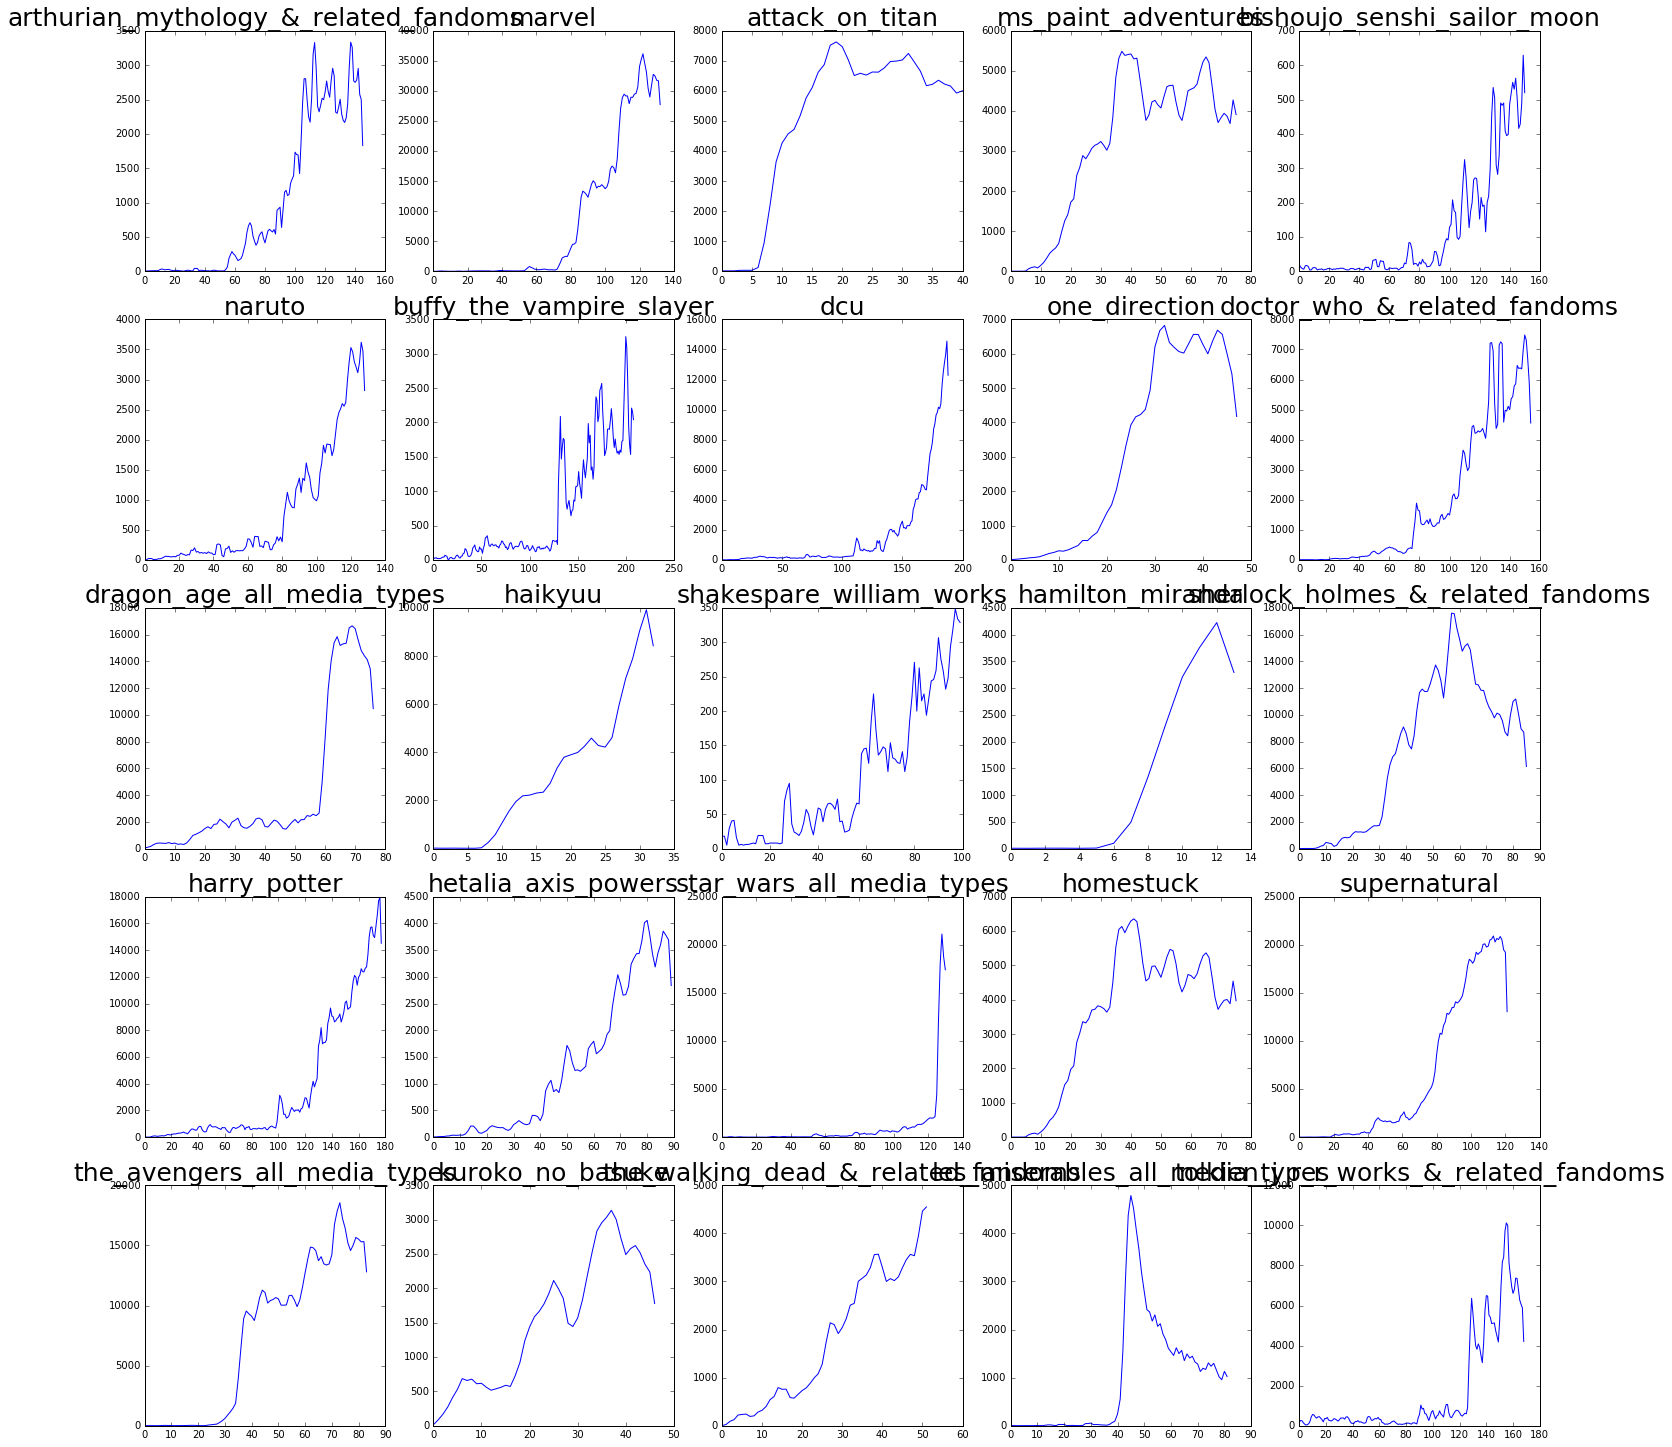

In [32]:
fig, axs = plt.subplots(5,5, figsize=(25, 25))
axs = axs.ravel()

for idx, fandom in enumerate(fandom_list):
    time_author_dict = {}
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    cos_dict = {}
    timelist = create_timelist(df)
    windows = create_timewindow(timelist, 3)
    for window in windows:
        df_t = create_df_time(df, window)
        key = '_'.join([i for i in window])
        time_author_dict[key] = len(df_t)

    labels = sorted(time_author_dict.keys())
    x = range(0, len(labels))
    y = [time_author_dict[k] for k in labels]
    axs[idx].plot(x, y) 
    axs[idx].set_title(fandom.replace('_metadata.tsv', ''), fontsize=25)


### Number of words

In [35]:
df_t.columns.values

array(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
       'Category', 'ChapterIndex', 'Chapters', 'Characters', 'Comments',
       'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language', 'Notes',
       'PublishDate', 'Rating', 'Relationship', 'Summary', 'Title', 'URL',
       'UpdateDate', 'Words'], dtype=object)

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


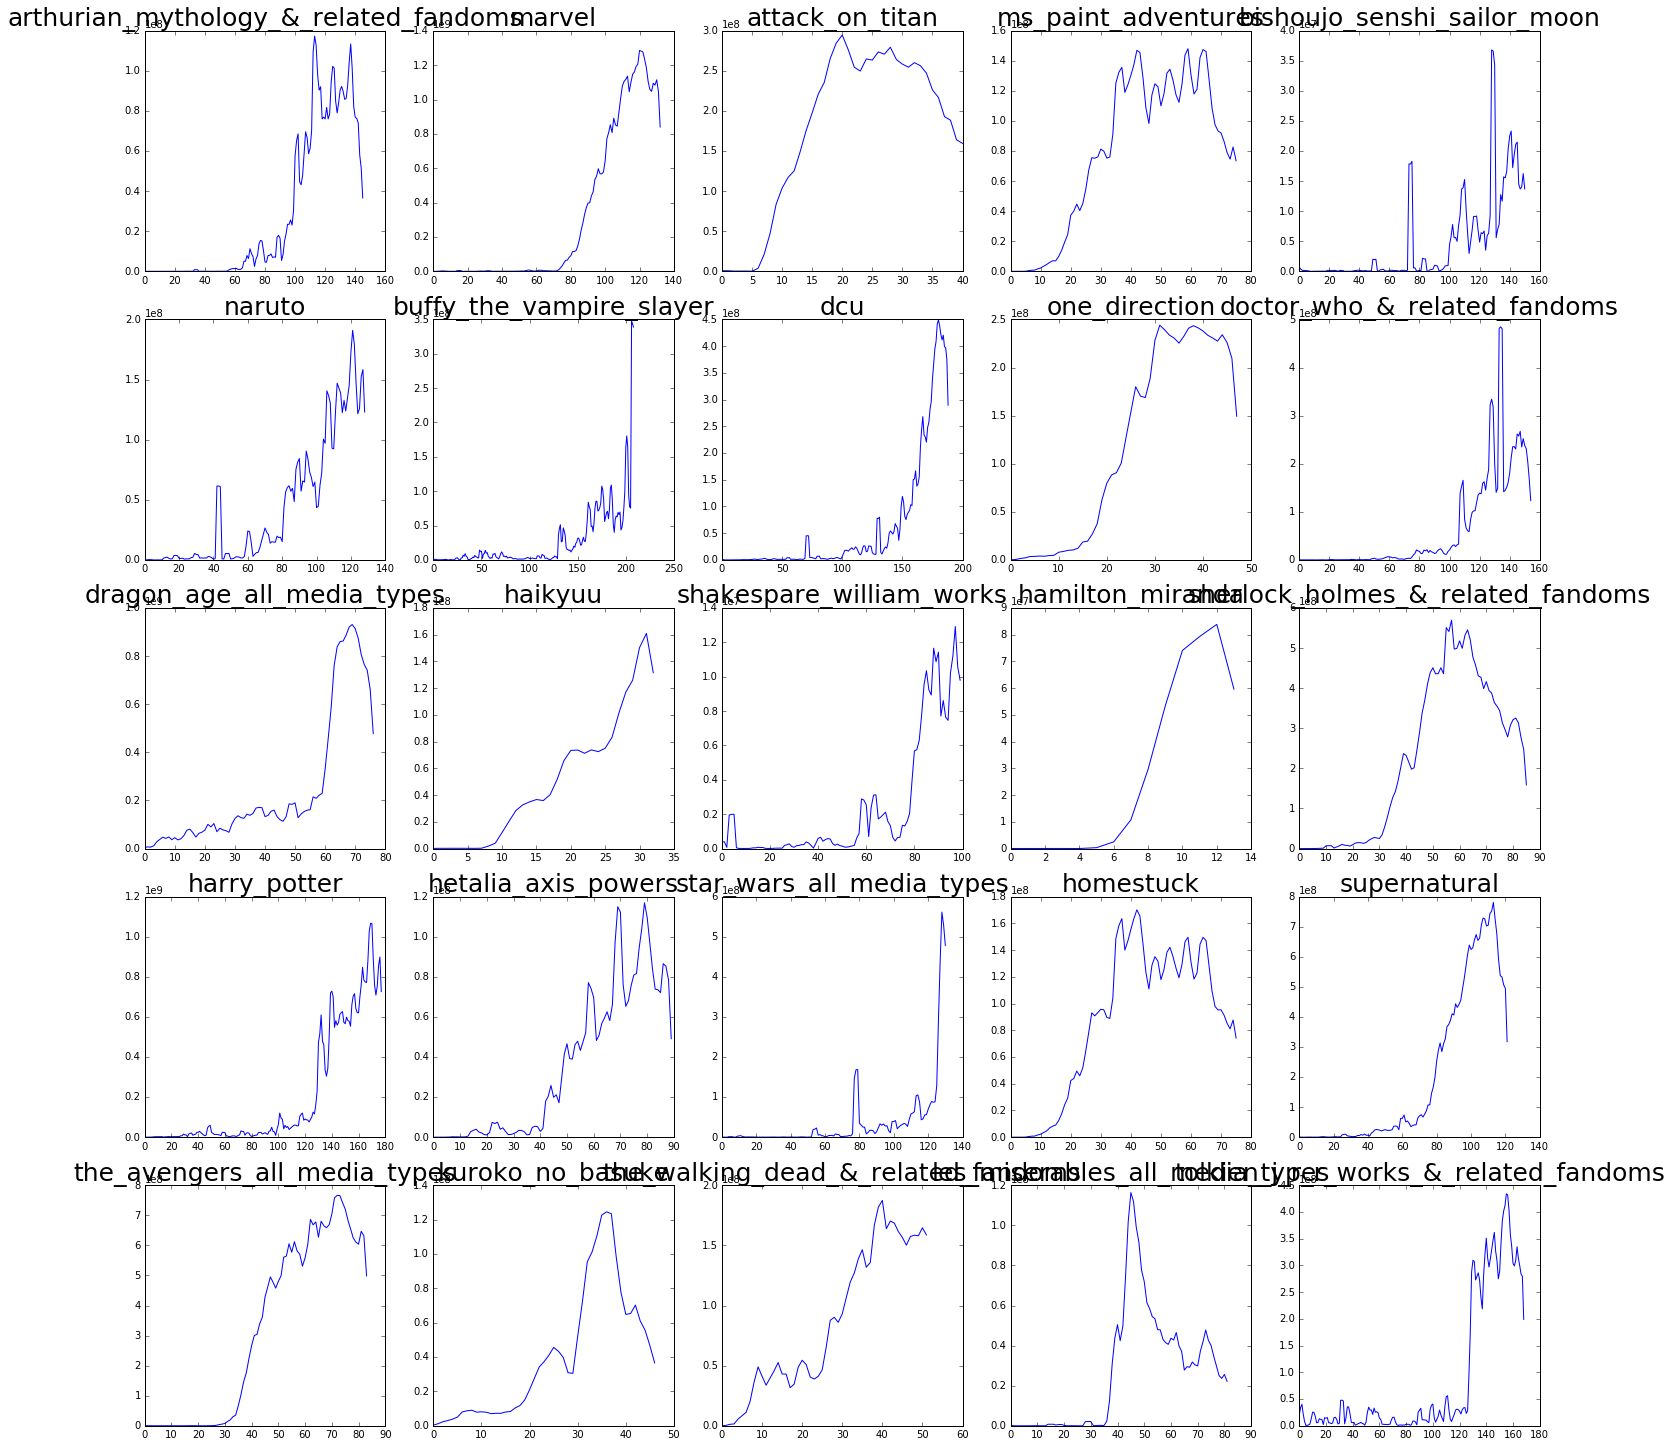

In [36]:
fig, axs = plt.subplots(5,5, figsize=(25, 25))
axs = axs.ravel()

for idx, fandom in enumerate(fandom_list):
    time_author_dict = {}
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    cos_dict = {}
    timelist = create_timelist(df)
    windows = create_timewindow(timelist, 3)
    for window in windows:
        df_t = create_df_time(df, window)
        key = '_'.join([i for i in window])
        time_author_dict[key] = np.sum(df_t.Words)

    labels = sorted(time_author_dict.keys())
    x = range(0, len(labels))
    y = [time_author_dict[k] for k in labels]
    axs[idx].plot(x, y) 
    axs[idx].set_title(fandom.replace('_metadata.tsv', ''), fontsize=25)
